In [1]:
import pathlib, json, pandas as pd

# 1)  Point to the **exact** folder you showed
DATA_DIR = pathlib.Path(
    "/home/mann/Downloads/my_spotify_data/Spotify Extended Streaming History"
)

# 2)  Grab every .json file in there
json_files = sorted(DATA_DIR.glob("*.json"))
print("Found:", len(json_files), "files")

# 3)  Load them all into one big list of dicts
records = []
for f in json_files:
    with open(f) as fp:
        records.extend(json.load(fp))

# 4)  Make a DataFrame
df = pd.DataFrame.from_records(records)
print("Total streams:", len(df))
df.head()


Found: 10 files
Total streams: 131265


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-04-18T13:01:46Z,"iOS 13.4.1 (iPhone11,6)",4437,GB,46.101.27.9,Love Me More,Trippie Redd,A Love Letter To You 4,spotify:track:6uYgCE2OEulOw5zhHvZsHf,None,...,None,None,None,playbtn,fwdbtn,False,False,False,NaN,False
1,2020-04-18T13:01:47Z,"iOS 13.4.1 (iPhone11,6)",704,GB,46.101.27.9,Out Of Luck,Lil Tecca,We Love You Tecca,spotify:track:1ipyiYqvds0wcaFDTW6N4X,None,...,None,None,None,fwdbtn,fwdbtn,False,False,False,NaN,False
2,2020-04-18T13:01:49Z,"iOS 13.4.1 (iPhone11,6)",2218,GB,46.101.27.9,Lean Wit Me,Juice WRLD,Goodbye & Good Riddance,spotify:track:3oDkdAySo1VQQG0ptV7uwa,None,...,None,None,None,fwdbtn,endplay,False,False,False,NaN,False
3,2020-04-18T13:01:53Z,"iOS 13.4.1 (iPhone11,6)",3008,GB,46.101.27.9,Welcome to the Party (with French Montana & Li...,Diplo,Welcome to the Party (with French Montana & Li...,spotify:track:5mqzhMuUpvnMfwNz6iepmO,None,...,None,None,None,clickrow,endplay,False,False,False,NaN,False
4,2020-04-18T13:03:20Z,"iOS 13.4.1 (iPhone11,6)",72042,TZ,196.207.172.100,1400 / 999 Freestyle,Trippie Redd,A Love Letter To You 3,spotify:track:75lcPkAkUsKWHGBlGM476R,None,...,None,None,None,clickrow,logout,False,False,False,NaN,False


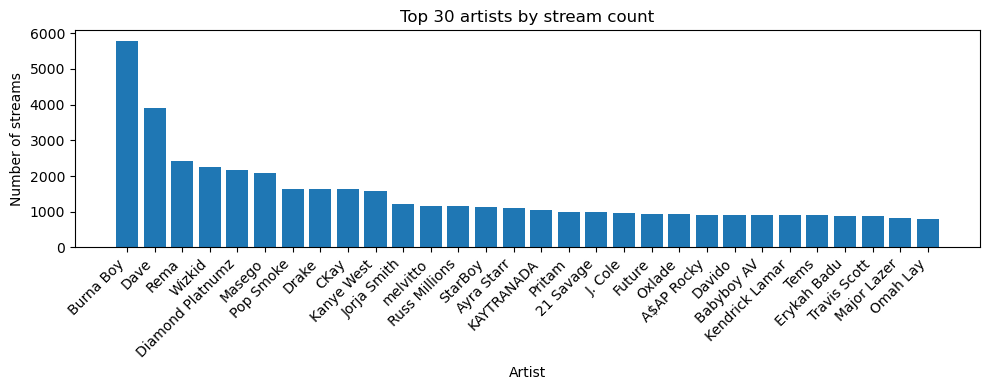

In [10]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1)  Count streams per artist and sort descending
# ------------------------------------------------------------------
artist_counts = (
    df['master_metadata_album_artist_name']        # artist column
      .fillna('Unknown')                           # safety for missing tags
      .value_counts()
      .sort_values(ascending=False)
)

# OPTIONAL: keep only the top N artists to avoid a crowded plot
N = 30
artist_counts = artist_counts.head(N)

# ------------------------------------------------------------------
# 2)  Bar plot
# ------------------------------------------------------------------
plt.figure(figsize=(10, 4))                        # widen for long names
plt.bar(artist_counts.index, artist_counts.values)

plt.xlabel("Artist")
plt.ylabel("Number of streams")
plt.title(f"Top {N} artists by stream count")
plt.xticks(rotation=45, ha='right')                # rotate labels for clarity
plt.tight_layout()
plt.show()


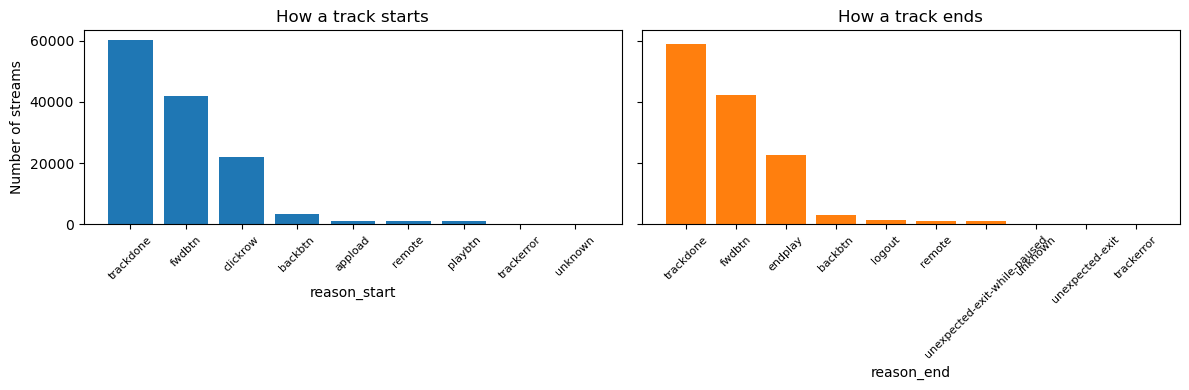

In [4]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1)  Frequency tables
# ------------------------------------------------------------------
start_counts = (
    df['reason_start']
      .fillna('Unknown')
      .value_counts()
      .sort_values(ascending=False)
)

end_counts = (
    df['reason_end']
      .fillna('Unknown')
      .value_counts()
      .sort_values(ascending=False)
)

# ------------------------------------------------------------------
# 2)  Plot: two bar charts side-by-side
# ------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# --- reason_start --------------------------------------------------
axes[0].bar(start_counts.index, start_counts.values)
axes[0].set_title("How a track starts")
axes[0].set_xlabel("reason_start")
axes[0].set_ylabel("Number of streams")
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

# --- reason_end ----------------------------------------------------
axes[1].bar(end_counts.index, end_counts.values, color="tab:orange")
axes[1].set_title("How a track ends")
axes[1].set_xlabel("reason_end")
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()


In [11]:
# --- totals ----------------------------------------------------------
total_ms_played = df['ms_played'].sum()
total_hours     = total_ms_played / 1000 / 3600    # convenient extra

print(f"Total listening time : {total_ms_played:,} ms  ≈ {total_hours:.1f} hours")

# --- unique artists --------------------------------------------------
num_artists = df['master_metadata_album_artist_name'].nunique(dropna=True)
print(f"Different artists     : {num_artists:,}")

# --- unique tracks ---------------------------------------------------
num_tracks  = df['master_metadata_track_name'].nunique(dropna=True)
print(f"Different tracks      : {num_tracks:,}")


Total listening time : 14,318,636,860 ms  ≈ 3977.4 hours
Different artists     : 3,944
Different tracks      : 10,032
